## 1. Importing the Required Python Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 2. Importing the Dataset to be analysed

In [2]:
data = pd.read_csv('E:\Data Analysis\data analysis project/who_suicide_statistics.csv')

## 3. Data Wrangling

In [3]:
data.head(5)
#look at 1st 5 data points

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [4]:
data.info()
# print the concise summery of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [5]:
data.shape
#43776 rows, 6 columns

(43776, 6)

In [6]:
# counts total row in each col. that have null values
# note: all the na columns are type Object
data.isna().sum()

country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64

In [7]:
# From above, we can see that, suicides_no & population, have null values.
#Lets, fill the null values with zero using 'fillna'
data= data.fillna(0)
# Now, we have no null columns!
data.isna().sum()

country        0
year           0
sex            0
age            0
suicides_no    0
population     0
dtype: int64

In [8]:
# The different age groups
data['age'].unique()

array(['15-24 years', '25-34 years', '35-54 years', '5-14 years',
       '55-74 years', '75+ years'], dtype=object)

In [9]:
# lists the different countries
data['country'].unique()

array(['Albania', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bermuda', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Cabo Verde', 'Canada', 'Cayman Islands', 'Chile', 'Colombia',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Falkland Islands (Malvinas)', 'Fiji',
       'Finland', 'France', 'French Guiana', 'Georgia', 'Germany',
       'Greece', 'Grenada', 'Guadeloupe', 'Guatemala', 'Guyana', 'Haiti',
       'Honduras', 'Hong Kong SAR', 'Hungary', 'Iceland',
       'Iran (Islamic Rep of)', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kiribati', 'Kuwait',
       'Kyrgyzstan', 'Latvia', 'Lithuania

In [10]:
# the Number of different Countries our dataset is from
data['country'].nunique()
# Our dataset is from 141 different Countries

141

In [11]:
# The different country groups
data['year'].unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 1983, 1984,
       2016, 1979, 1980, 1981, 1982], dtype=int64)

In [12]:
# Replace 0 values with, NA
data['suicides_no'] = data['suicides_no'].replace(0,np.NAN)

# replace Na values with, mean value
mean_value=data['population'].mean()

data['population']=data['population'].fillna(mean_value)

In [13]:
# do same for Popualation
# replace Na values with, mean value
mean_value=data['suicides_no'].mean()

data['suicides_no']=data['suicides_no'].fillna(mean_value)

### ------------------------------------------------------------------------------------------------


## 4. Exploratory Data Analysis


### Question 1. Which year has the most Suicides ? Which year has the least Suicides ?

In [14]:
data['suicides_no'] = data['suicides_no'].replace(0,np.NAN)

mean_value=data['suicides_no'].mean()
data['suicides_no']=data['suicides_no'].fillna(mean_value)

def find_minmax(x):
     #use the function 'idmin' to find the index of lowest suicide
    min_index = data[x].idxmin()
    #use the function 'idmax' to find the index of Highest suicide
    high_index = data[x].idxmax()
    
    high = pd.DataFrame(data.loc[high_index,:])
    low = pd.DataFrame(data.loc[min_index,:])
    
    #print the Year with high and low suicide
    print("Year Which Has Highest "+ x + " : ",data['year'][high_index])
    print("Year Which Has Lowest "+ x + "  : ",data['year'][min_index])
    return pd.concat([high,low],axis = 1)

find_minmax('suicides_no')

Year Which Has Highest suicides_no :  1994
Year Which Has Lowest suicides_no  :  1987


,33128,29
country,Russian Federation,Albania
year,1994,1987
sex,male,female
age,35-54 years,75+ years
suicides_no,22338,1
population,1.90442e+07,35600


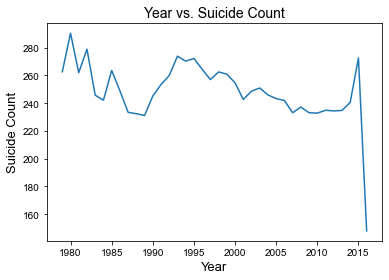

In [15]:
# year-wise analysis of mean number sucidies of each year
            # x             #y
data.groupby('year')['suicides_no'].mean().plot()

#setup the title and labels of the figure.
plt.title("Year vs. Suicide Count",fontsize = 14)
plt.xlabel('Year',fontsize = 13)
plt.ylabel('Suicide Count',fontsize = 13)

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")

From observing our Time Series Line Plot, we can see a sharp drop in suicides in 1985.



### -----------------------------------------------------------------------------------------------------------------

### Question 2. Which country has the most Suicides ? Which country has the least Suicides ?

In [16]:
def find_minmax(x):
     #use the function 'idmin' to find the index of lowest suicide
    min_index = data[x].idxmin()
    #use the function 'idmax' to find the index of Highest suicide
    high_index = data[x].idxmax()
    
    high = pd.DataFrame(data.loc[high_index,:])
    low = pd.DataFrame(data.loc[min_index,:])
    
    #print the country with high and low suicide
    print("Country Which Has Highest "+ x + " : ",data['country'][high_index])
    print("Country Which Has Lowest "+ x + "  : ",data['country'][min_index])
    return pd.concat([low,high],axis = 1)

find_minmax('suicides_no')

Country Which Has Highest suicides_no :  Russian Federation
Country Which Has Lowest suicides_no  :  Albania


,29,33128
country,Albania,Russian Federation
year,1987,1994
sex,female,male
age,75+ years,35-54 years
suicides_no,1,22338
population,35600,1.90442e+07


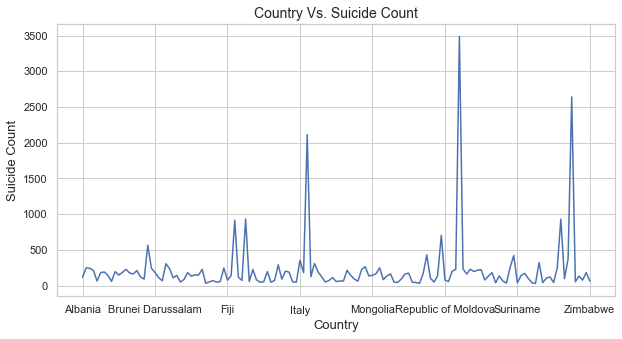

In [17]:
# year-wise analysis of mean number sucidies of each year
            # x             #y
data.groupby('country')['suicides_no'].mean().plot()

#info = pd.DataFrame(data['country'].sort_values(ascending = False))

#setup the title and labels of the figure.
plt.title("Country Vs. Suicide Count",fontsize = 14)
plt.xlabel('Country',fontsize = 13)
plt.ylabel('Suicide Count',fontsize = 13)

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")

The graph confirm that Albania had the lowest suicide count, while Zimbabwe & Russian Federation, had the largest suicide count. A reason the Russian Federations may have a large suicide count may be that they have a very large population (144.5 million, while Albania only has about 3 million).

### --------------------------------------------------------------------------------------------------------------------


### Question 3. Correlation between Age group and Suicides

In [18]:
sample = data.sample(3)

In [19]:
sample

,country,year,sex,age,suicides_no,population
7415,Bulgaria,1993,male,75+ years,141.0,156400.0
41967,United States of America,1983,female,5-14 years,53.0,16782000.0
1125,Argentina,1984,male,5-14 years,15.0,2997300.0


In [20]:
 # grabs first 2 chars from Age Column
data['AgeNum'] = data['age'].str[:2]

# remove all instances of dash -
data['AgeNum'] = data['AgeNum'].map(lambda x: x.replace('-',''))

# now, convert it to type int (not Object)
data['AgeNum'] = data['AgeNum'].astype(int)

data['AgeNum'].tail(3)

43773     5
43774    55
43775    75
Name: AgeNum, dtype: int32

In [21]:
# creates Age Categories
def AgeGroup(x):
    if(x >= 60):
        return "Elderly"
    elif(x >= 30):
        return "Middle_Aged_Adults"
    elif(x >= 18):
        return "Adults"
    else:
        return "Adolescent"
# Map each row in the Col to the AgeGroup Method
data['AgeCategory'] = data['AgeNum'].map(lambda x: AgeGroup(x))
# convert it back to type String
data['AgeCategory'] = data['AgeCategory'].astype(str)
data['AgeCategory'].tail(3)

43773            Adolescent
43774    Middle_Aged_Adults
43775               Elderly
Name: AgeCategory, dtype: object

In [22]:
data['AgeNum'] .tail(3)

43773     5
43774    55
43775    75
Name: AgeNum, dtype: int32

In [23]:
data.head(3)

,country,year,sex,age,suicides_no,population,AgeNum,AgeCategory
0,Albania,1985,female,15-24 years,249.106328,277900.0,15,Adolescent
1,Albania,1985,female,25-34 years,249.106328,246800.0,25,Adults
2,Albania,1985,female,35-54 years,249.106328,267500.0,35,Middle_Aged_Adults


Text(5.960000000000001, 0.5, 'Suicide Count')

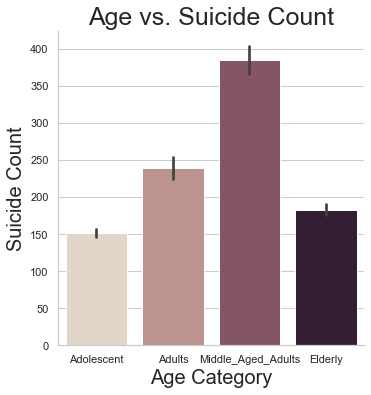

In [24]:
sns.catplot(x="AgeCategory", y="suicides_no",palette="ch:.25", kind="bar",data=data);

plt.title('Age vs. Suicide Count',size=25)
plt.xlabel('Age Category',size=20)
plt.ylabel('Suicide Count',size=20)

The data illustrates that middle aged adults, between the ages of 30 through 60, have the highest suicide count. While elderly and adolescents have about half the amount as middle aged adults.

### -------------------------------------------------------------------------------------------------------------------------------------


### Question 3. Relationship between Gender and Number of Suicides

In [25]:
data['sex'].value_counts()
# there is an equal number of Males & Females in our data

male      21888
female    21888
Name: sex, dtype: int64

Note: Hue, allows us to add another dimensionality to our analysis!

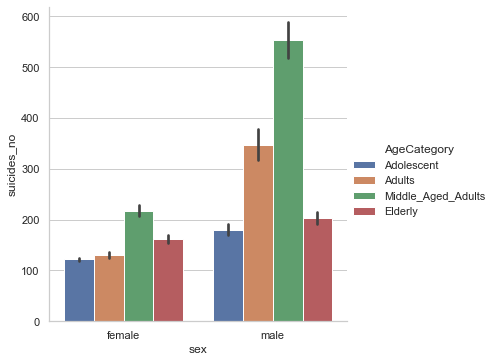

In [26]:
sns.catplot(x="sex", y="suicides_no", hue="AgeCategory", kind="bar", data=data);

Data show heightend differences in suicide for different sexes. It's evident that males are more inclined to suicide.

## 5. Conclusions

1. There was a decrease in suicides toward the 80's
    
2. The data illustrates that middle aged adults, between the ages of 30 through 60, have the highest suicide count. While elderly and adolescents have about half the amount as middle aged adults.

3. Data show alarming differences in suicide for different sexes. It's evident that males are more inclined to suicide, than females.

## 6.  References


October 14, 2019 by SSM Health. “Why Are Middle-Aged White Men More Likely to Die by Suicide?” SSM Health, www.ssmhealth.com/blogs/ssm-health-matters/october-2019/middle-aged-men-more-likely-to-die-by-suicide.